<span style="color:green;font-weight:bold">Name : Rashmi Bhaskar 

<span style="color:green;font-weight:bold">Github Username : rashmibhaskar

<span style="color:green;font-weight:bold">USC ID : 4408460333

In [1]:
import sys
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import preprocessing
from scipy.stats import bootstrap as bss
import seaborn as sbn
import matplotlib.pyplot as plt
from collections import defaultdict
import scipy.stats as stats
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.metrics import roc_curve, confusion_matrix, roc_auc_score, auc
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.feature_selection import chi2
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# HW3

(a)
Download the AReM data from:https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+system+based+on+Multisensor+data+fusion+\%28AReM\%29. The dataset contains 7 folders that represent seven types of activities. In each folder, there are multiple files each of which represents an instant of a humanperforming an activity.Each file containis 6 time series collected from activitiesof the same person, which are called avgrss12, varrss12, avgrss13, varrss13,vgrss23, and arrss23. There are 88 instances in the dataset, each of which contains 6 time series and each time series has 480 consecutive values.

In [2]:
trainLength = [7, 6, 15, 15, 15, 15, 15]
testLength = [2, 2, 3, 3, 3, 3, 3]
data = {}

activity_file = ['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']
column_names = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']

# CWD = os.getcwd()
# baseURL = os.path.abspath(os.path.join(CWD, os.pardir)) + '/data/'
  
for i in range(0, len(activity_file)):
    for j in range(1, trainLength[i]+1):
        fileUrl = '../data/AReM/' + activity_file[i] + '/dataset' + str(j) + '.csv'
        data[fileUrl] = pd.read_csv(fileUrl, sep=",|\s+", skiprows=5, on_bad_lines='skip', usecols=range(1,7), engine='python', names=column_names)

            
# for key,value in data.items():
#     print('File Name:', key)
#     display(value)
#     print('-----------------------------------------------------------------------')
#     print()

(b)
Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.

In [3]:
train_data = {}

for i in range(0, len(activity_file)):
    start = testLength[i]+1
    end = trainLength[i]
    for j in range(start, end+1):
        fileName = '../data/AReM/' + activity_file[i] + '/dataset' + str(j) + '.csv'
        train_data[fileName] = data[fileName]

# for key,value in train_data.items():
#     print('File Name:', key)
#     display(value)
#     print('-----------------------------------------------------------------------')
#     print()

In [4]:
test_data = {}

for i in range(0, len(activity_file)):
    start = 1
    end = testLength[i]
    for j in range(start, end+1):
        fileName = '../data/AReM/' + activity_file[i] + '/dataset' + str(j) + '.csv'
        test_data[fileName] = data[fileName]
# for key,value in test_data.items():
#     print('File Name:', key)
#     display(value)
#     print('-----------------------------------------------------------------------')
#     print()

(c)
Feature Extraction Classification of time series usually needs extracting features from them. In this problem, we focus on time-domain features.

i.Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc).


Simple statistical features
 - Mean
 - Maximum and Minimum values
 - Standard deviations
 - Skewness, Kurtosis and Higher order moments of all 𝑑 dimensions

Time series analysis related features
 - Cross-Correlations between 𝑑×𝑑−1 dimensions
 - 𝑑 number of Auto-Correlations
 - Orders of the autoregressive (AR), integrated (I) and moving average (MA) part of an estimated ARIMA model
 - Parameters of the Autoregressive (AR) and Moving Average (MA) part of an estimated ARIMA model

ii.
Extract the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series in each instance. You are free to normalize/standardize features or use them directly.


In [5]:
#Using direct features
data_f = {}
for c in column_names:
    data_f["file_name"]=[]
    for tf in ["min","max","mean","median","std","1st_quartile","3rd_quartile"] :
        data_f[c+"_"+tf] = []

for key,value in data.items():
    data_f["file_name"].append(key)
    for col in column_names:
        data_f[col+"_"+"min"].append(value[col].min())
        data_f[col+"_"+"max"].append(value[col].max())
        data_f[col+"_"+"mean"].append(value[col].mean())
        data_f[col+"_"+"median"].append(value[col].median())
        data_f[col+"_"+"std"].append(value[col].std())
        data_f[col+"_"+"1st_quartile"].append(value[col].quantile(0.25))   
        data_f[col+"_"+"3rd_quartile"].append(value[col].quantile(0.75))
data_f = pd.DataFrame.from_dict(data_f)           
# data_f

In [6]:
#Using normalized features
norm_df = {}
for k,v in data.items():
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(v.values)
    norm_df[k] = pd.DataFrame(x_scaled)
data_f_norm = {}
for c in column_names:
    for tf in ["min","max","mean","median","std","1st_quartile","3rd_quartile"] :
        data_f_norm[c+"_"+tf] = []

for key,value in norm_df.items():
    v_df = pd.DataFrame(value)
    v_df.columns= ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
    for col in column_names:
        data_f_norm[col+"_"+"min"].append(v_df[col].min())
        data_f_norm[col+"_"+"max"].append(v_df[col].max())
        data_f_norm[col+"_"+"mean"].append(v_df[col].mean())
        data_f_norm[col+"_"+"median"].append(v_df[col].median())
        data_f_norm[col+"_"+"std"].append(v_df[col].std())
        data_f_norm[col+"_"+"1st_quartile"].append(v_df[col].quantile(0.25))   
        data_f_norm[col+"_"+"3rd_quartile"].append(v_df[col].quantile(0.75))
        
data_f_norm = pd.DataFrame.from_dict(data_f_norm)           
# data_f_norm

iii.
Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python’s bootstrapped or any other method to build a 90% bootsrap confidence interval for the standard deviation of each feature.

In [7]:
data_f_features = data_f.iloc[:,1:]
std_df = pd.DataFrame(data_f_features.std())
std_df.columns = ["Standard Deviation"]
#bootstrapping and finding 90% interval for direct features
data_90_CI = {}
for cols in data_f_features.columns.tolist():
    sample = (data_f_features[cols].to_list(),)
    bootstrap_ci = bss(sample, np.std, confidence_level=0.90,random_state=1, method='percentile')
    data_90_CI[cols] = [bootstrap_ci.confidence_interval.low,bootstrap_ci.confidence_interval.high]
df_90= pd.DataFrame.from_dict(data_90_CI, orient='index',columns=["Confidence Interval Low","Confidence Interval High"])
df_90 = std_df.join(df_90)
# df_90

iv.
Use your judgement to select the three most important time-domain features (one option may be min, mean, and max).

- Mean - Since time series is a continuous data, the average value calculating the central tendency is one of the best feature

- Max - To detect the maximum value in the time series.

- Standard deviation - measures the variablility of the distributed dataset as well statistically gives a certain level of confidence in drawing conclusions about our model.

2.
I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, as well as a separate cubic regression, i.e. Y = β0 +β1X +β2X2 +β3X3 +ε.

(a) Suppose that the true relationship between X and Y is linear, i.e. Y = β0 + β1X + ε. Consider the training residual sum of squares(RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

We could expect Train RSS of the cubic regression to be slighly lower than that of linear regression. This is so because, as the polynomial number increases the flexibility of the model increases. Moreover, since we are working with a small dataset, the model will likely overfit and thus will have lower Train RSS.

(b) Answer (a) using test rather than training RSS.

Considering the true relationship between X and Y to be linear, we could expect the Test RSS of linear regression to perform slightly better than the cubic regression. As from explanation in (a) w.k.t, linear regression model is less flexible than the cubic model, thus contributing to lesser variance. Since the Test RSS is influenced by variance, lower variance of linear model leads to lower Test RSS.

(c) Suppose that the true relationship between X and Y is not linear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

We could expect Train RSS of the cubic regression to be lower than that of linear regression. Again, for the fact that cubic model is more flexible than a linear model this reducing the Train RSS.

(d) Answer (c) using test rather than training RSS.

The answer to this question is based on the extent of non-linearity of the relationship as well as the sample training dataset.
- if cubic model is closer to the non-linear relationship, then the cubic regression is likely to have lower Test RSS.
- if linear model is closer to the non-linear relationship, then linear regression is likely to have lower TEst RSS

# HW4

2. Time Series Classification Part 2: Binary and Multiclass Classification
(a) Binary Classification Using Logistic Regression
i. Assume that you want to use the training set to classify bending from otheractivities, i.e. you have a binary classification problem. Depict scatter plots of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities. (See p. 129 of the textbook).

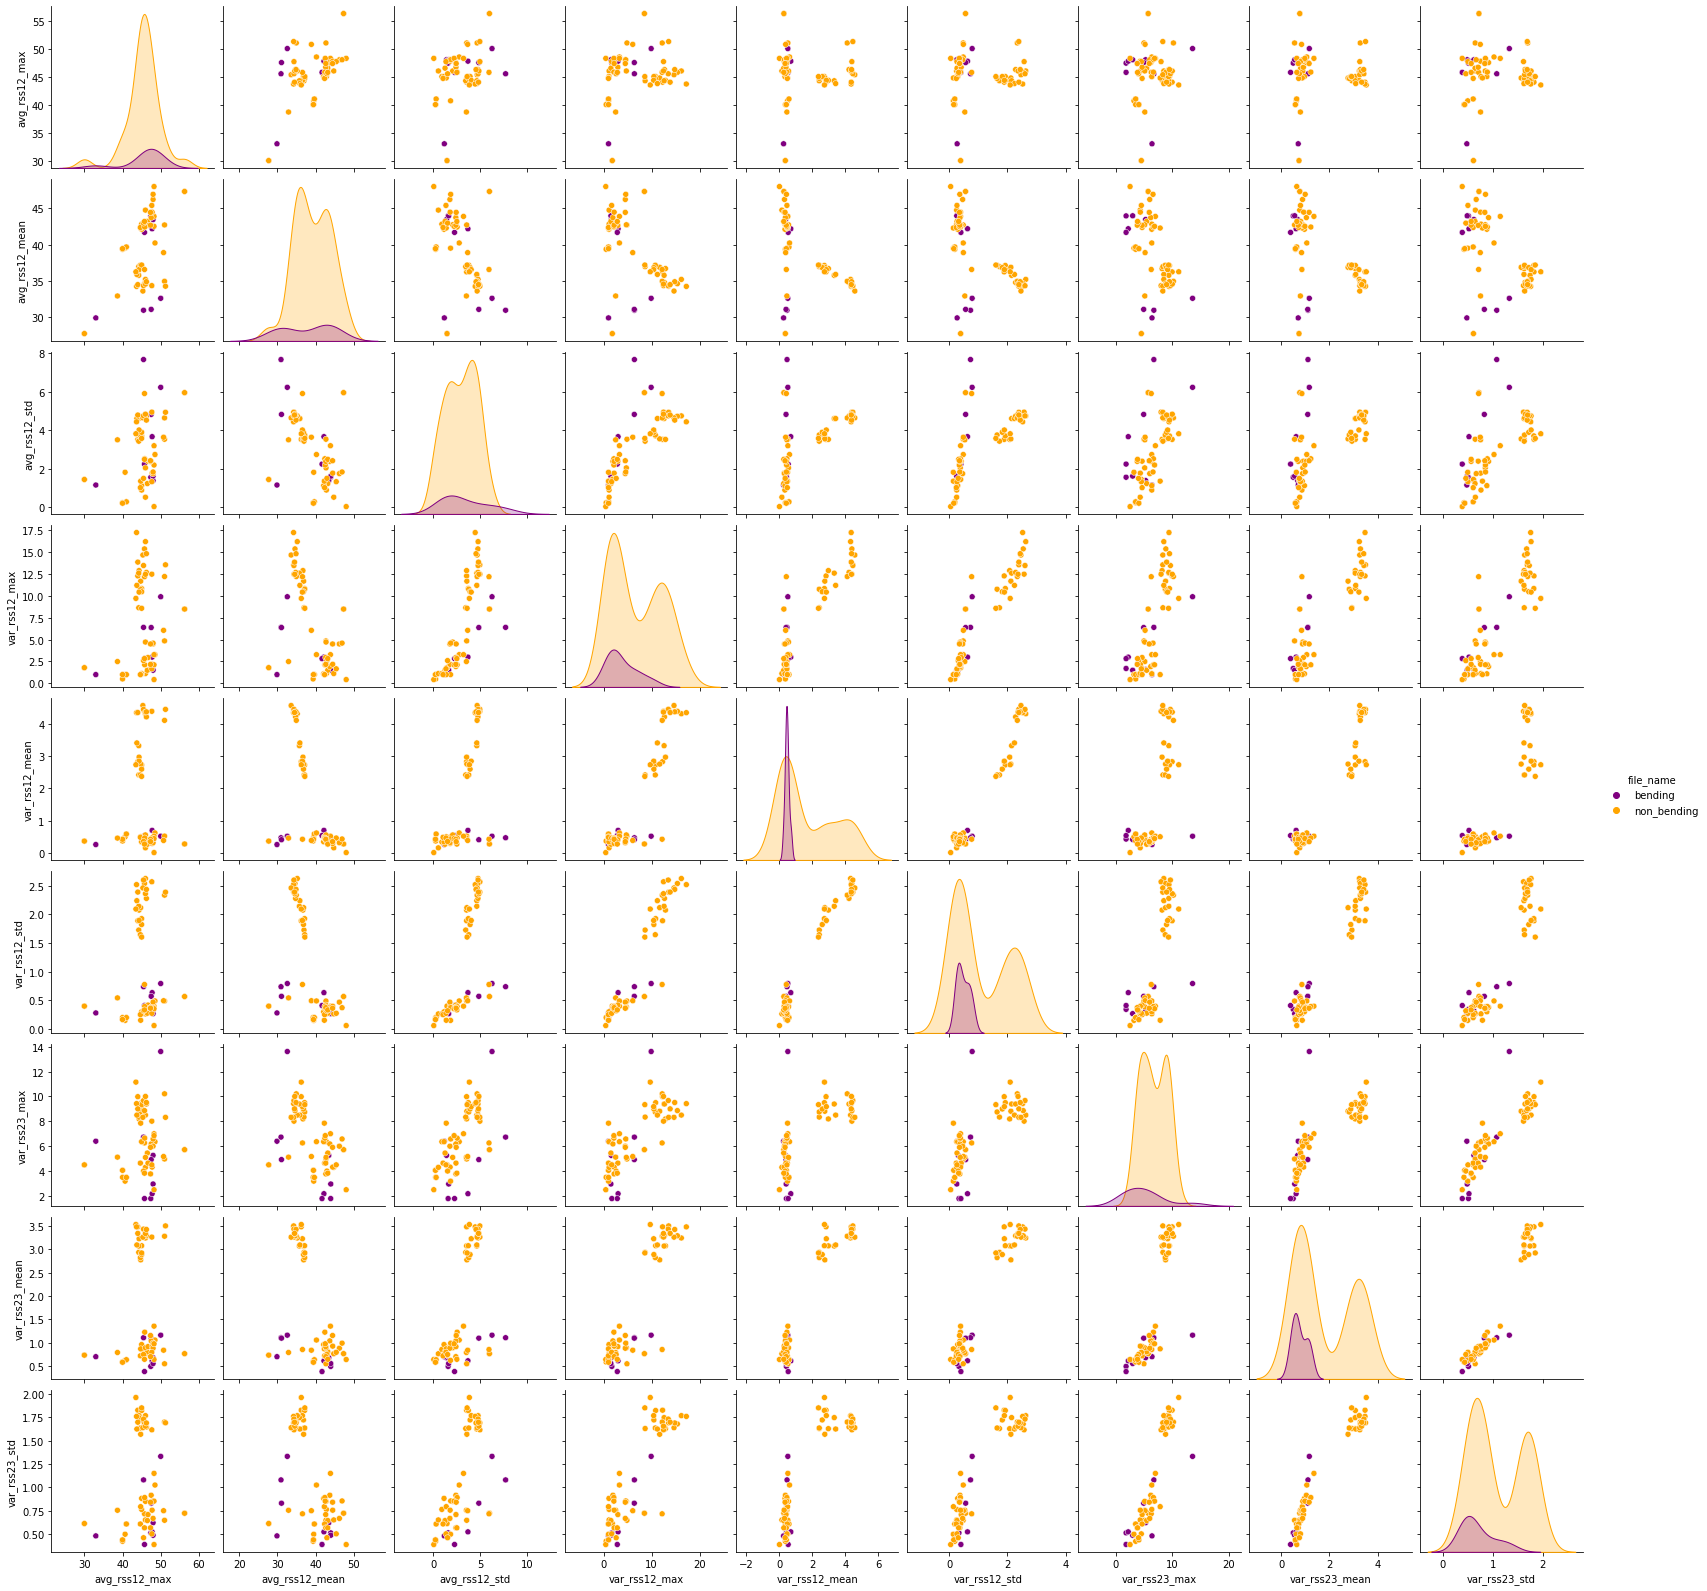

In [8]:
extracted_features = ['avg_rss12_max', 'avg_rss12_mean', 'avg_rss12_std', 'var_rss12_max','var_rss12_mean', 'var_rss12_std', 'var_rss23_max','var_rss23_mean','var_rss23_std']
selected_stats = ['max','mean','std']
selected_columns = ['avg_rss12','var_rss12','var_rss23']
#Using direct features
traindata_f = {}
traindata_f["file_name"]=[]
for ef in extracted_features:
    traindata_f[ef] = []

for key,value in train_data.items():
    activity = key.split('/')
    traindata_f["file_name"].append("bending" if activity[3]=="bending1" or activity[3]=="bending2" else "non_bending")
    for col in selected_columns:
        traindata_f[col+"_"+"max"].append(value[col].max())
        traindata_f[col+"_"+"mean"].append(value[col].mean())
        traindata_f[col+"_"+"std"].append(value[col].std())
traindata_f = pd.DataFrame.from_dict(traindata_f)           
# print(traindata_f.to_string())

sbn.pairplot(data=traindata_f, hue='file_name', palette={'bending':'purple','non_bending':'orange'})

In [9]:
bending_traindata_df = traindata_f[traindata_f['file_name'] == "bending"]
# display(bending_traindata_df)

nonbending_traindata_df = traindata_f[traindata_f['file_name'] == "non_bending"]
# nonbending_traindata_df

cols =list(traindata_f.columns.values)[1:]

2(a)ii.Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the training instances, you have 12 time series for each training instance. Repeat the experiment in 2(a)i, i.e depict scatter plots of the features extracted from both parts of the time series 1,2, and 6. Do you see any considerable difference in the results with those of 2(a)i?

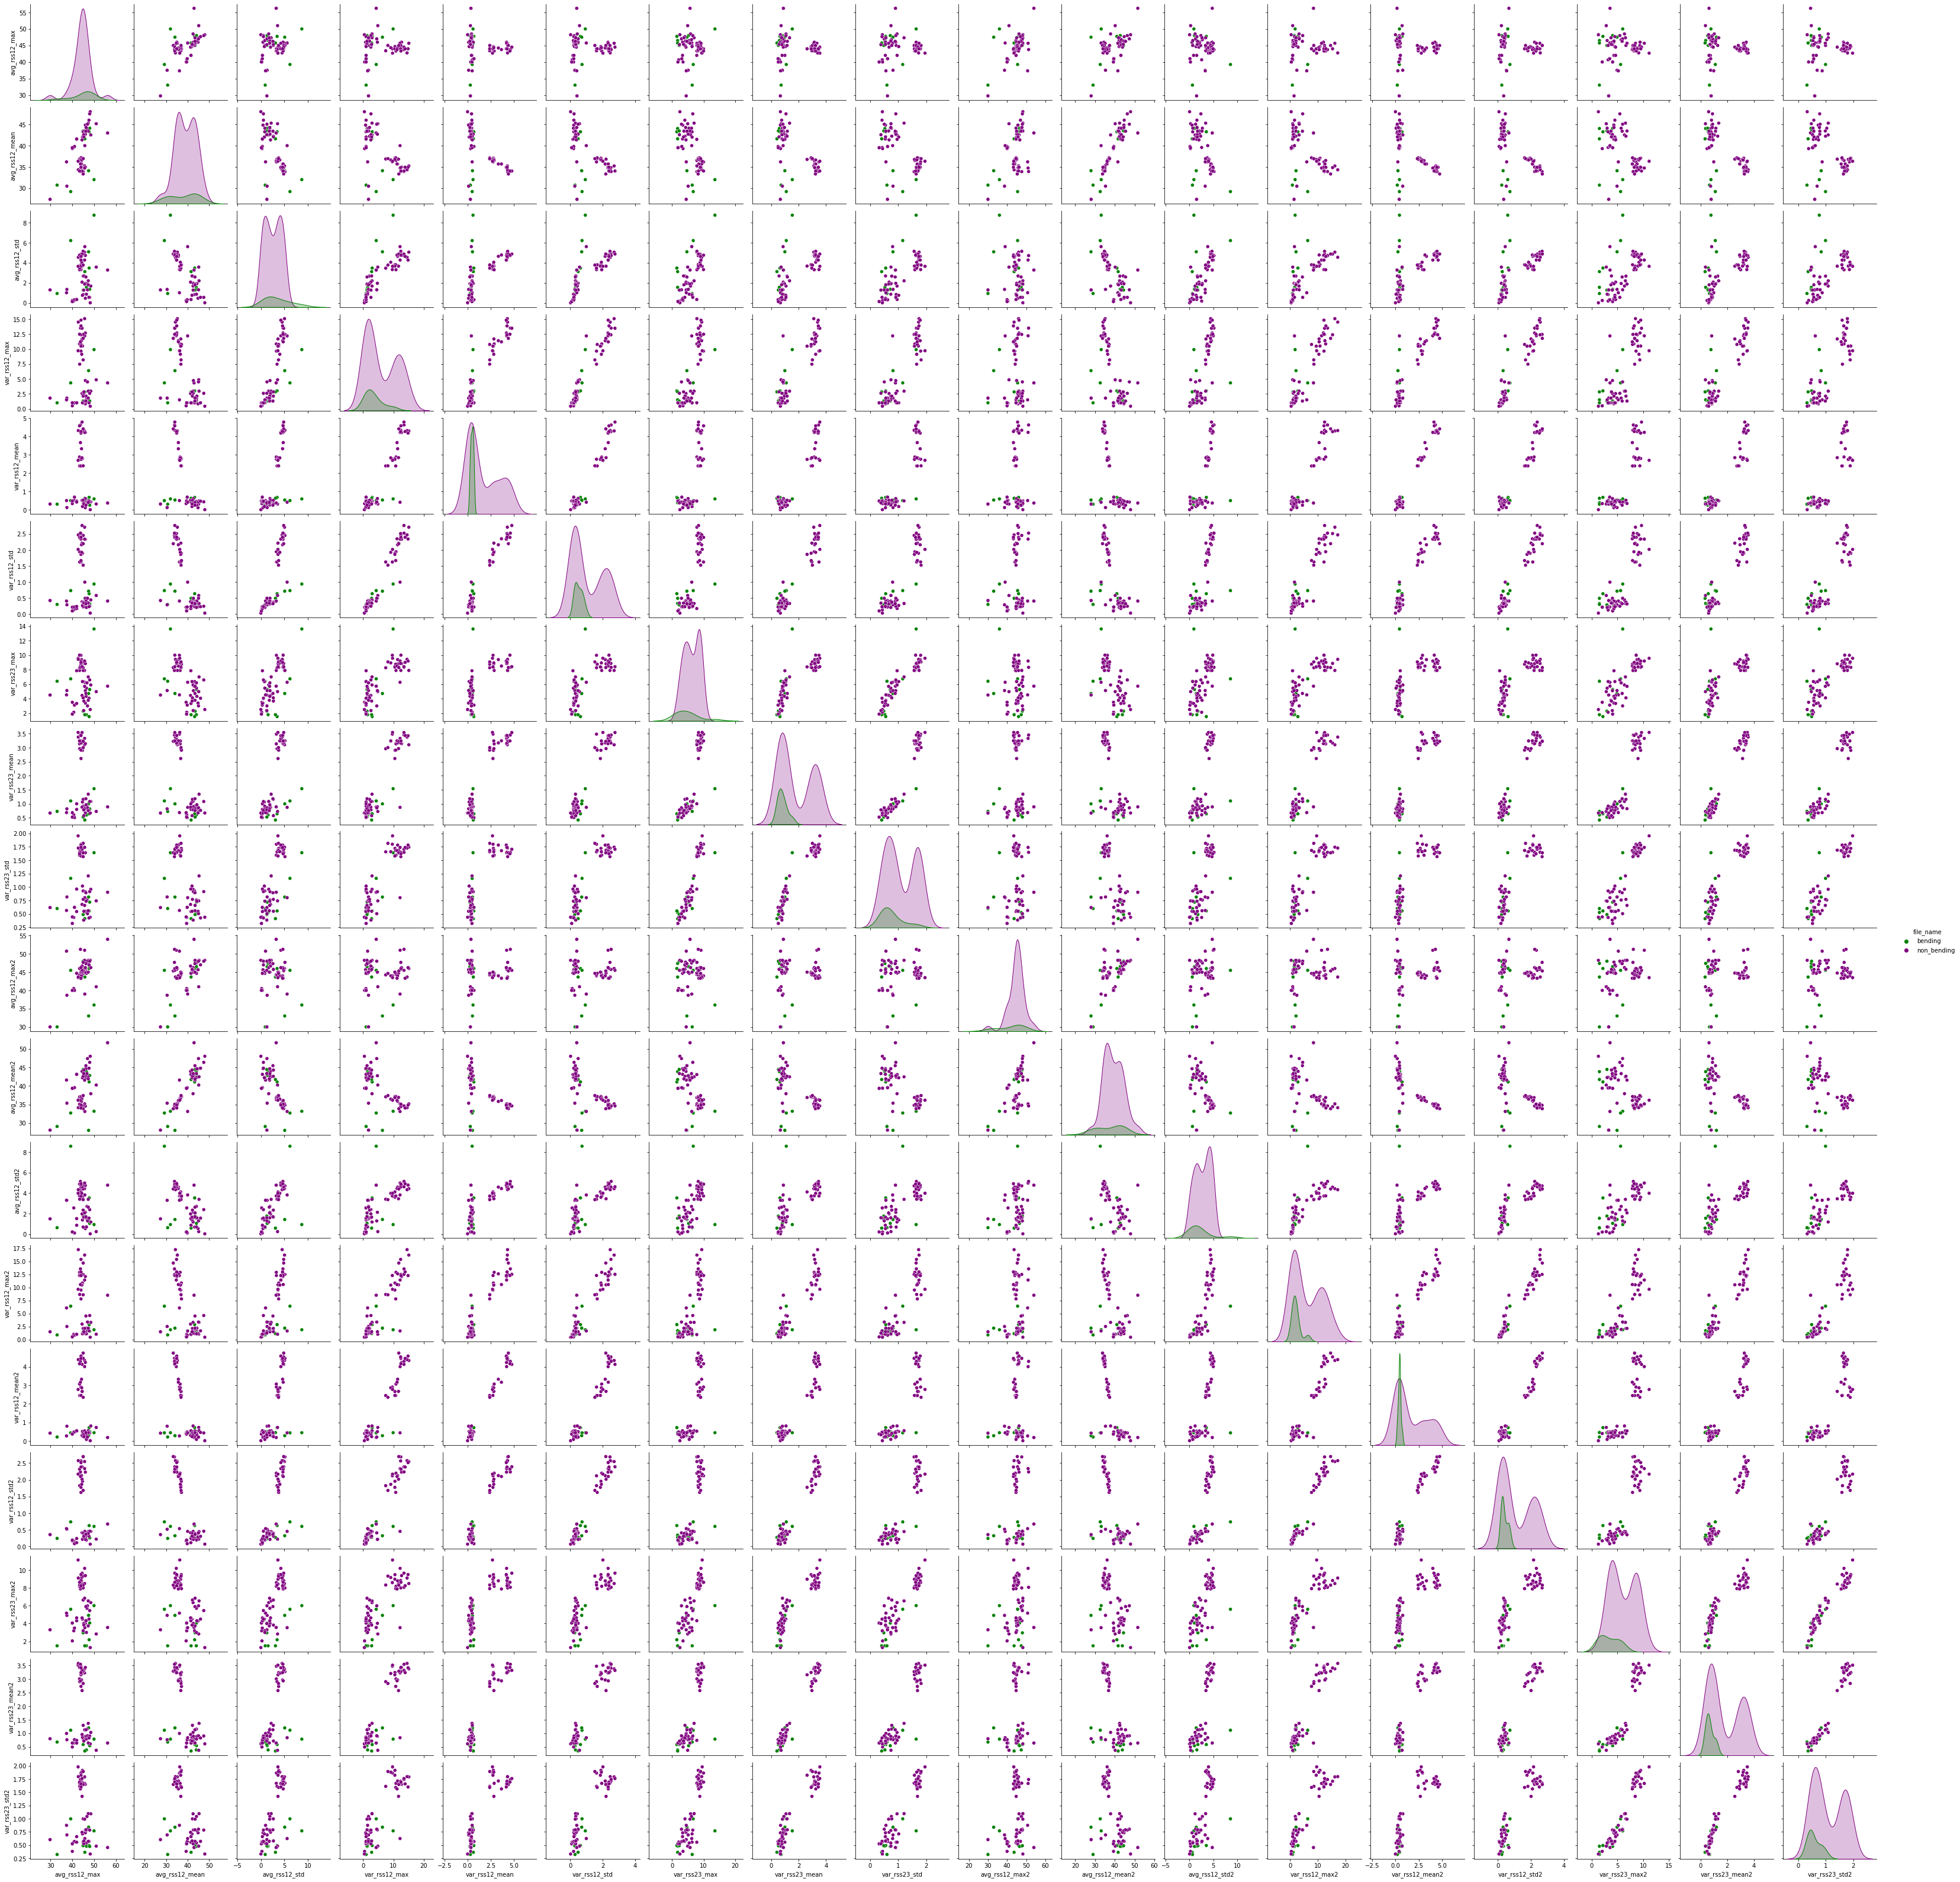

In [10]:
part1_f = {}
part2_f = {}

part1_f["file_name"]=[]
part2_f["file_name"]=[]
for ef in extracted_features:
    part1_f[ef] = []
    part2_f[ef+"2"] = []

for key,value in train_data.items():
    activity = key.split('/')
    part1 = value.iloc[:len(value)//2,:]
    part2 = value.iloc[len(value)//2:,:]
    part1_f["file_name"].append("bending" if activity[3]=="bending1" or activity[3]=="bending2" else "non_bending")
    part2_f["file_name"].append("bending" if activity[3]=="bending1" or activity[3]=="bending2" else "non_bending")
    for col in selected_columns:
        part1_f[col+"_"+"max"].append(part1[col].max())
        part1_f[col+"_"+"mean"].append(part1[col].mean())
        part1_f[col+"_"+"std"].append(part1[col].std())
        part2_f[col+"_"+"max2"].append(part2[col].max())
        part2_f[col+"_"+"mean2"].append(part2[col].mean())
        part2_f[col+"_"+"std2"].append(part2[col].std())
part1_f = pd.DataFrame.from_dict(part1_f)     
part2_f = pd.DataFrame.from_dict(part2_f) 
part_final = pd.concat([part1_f, part2_f.iloc[:,1:]], axis=1)
# part_final = part_final.rename(columns={"avg_rss12_max": "1", "avg_rss12_mean": "2", "avg_rss12_std": "3", "var_rss12_max":"4", "var_rss12_mean":"5", "var_rss12_std":"6", "var_rss23_max":"7","var_rss23_mean":"8","var_rss23_std":"9","avg_rss12_max2":"10","avg_rss12_mean2":"11","avg_rss12_std2":"12","var_rss12_max2":"13","var_rss12_mean2":"14","var_rss12_std2":"15","var_rss23_max2":"16","var_rss23_mean2":"17","var_rss23_std2":"18"})
# display(part_final)


sbn.pairplot(data=part_final, hue='file_name', palette={'bending':'green','non_bending':'purple'})


2(a)iii. Break each time series in your training set into l in set {1, 2, ..., 20} time series of approximately equal length and use logistic regression to solve the binary classification problem, using time-domain features. Remember that breaking each of the time series does not change the number of instances. It only changes the number of features for each instance. Calculate the p-values for your logistic regression parameters in each model corresponding to each value of l and refit a logistic regression model using your pruned set of features.
Alternatively, you can use backward selection using sklearn.feature selection or glm in R. Use 5-fold cross-validation to determine the best value of the pair (l, p), where p is the number of features used in recursive feature elimination. Explain what the right way and the wrong way are to perform cross-validation in this problem. Obviously, use the right way! Also, you may encounter the problem of class imbalance, which may make some of your folds not having any instances of the rare class. In such a case, you can use stratified cross validation. Research what it means and use it if needed.

In [11]:
def get_data_frame(data,l,classification='bi'):
    feature_names = []
    df = []
    feature_names.append('activity')
    xx=1
    for key,value in data.items():
        activity = key.split('/')[3]
        splits = np.array_split(value, l)
        file_stats = []
        if classification=='bi':
            file_stats.append(1 if activity=='bending1' or activity=='bending2' else 0)
        for idx,split in enumerate(splits):
            for i in range(0,6):
                stats = {'max':split[column_names[i]].max(),'mean':split[column_names[i]].mean(),'std':split[column_names[i]].std()}
                for feature in selected_stats:
                    if len(feature_names)<=3*6*l:
                        feature_names.append(column_names[i]+ '_' + feature + '_split' + str(idx))
                        # feature_names.append(str(xx)+ '_' + feature + '_split' + str(idx))
                    file_stats.append(stats[feature])
                xx+=1
        df.append(file_stats)
    df = pd.DataFrame(df, columns=feature_names)
    return df,feature_names

In [12]:
L_accuracy_list = []
best_LP = {}
trainDataL = {}

for l in range(1, 21):
    df_2aiii,feature_names = get_data_frame(train_data,l)

    X = df_2aiii.loc[:,df_2aiii.columns!='activity']
    y = df_2aiii['activity']

    ACC_list = []
    AUC_list = []
    feature_list = []

    skf = StratifiedKFold(n_splits=5)

    for train_index, val_index in skf.split(X,y):

        X_train, X_val = X.iloc[train_index.tolist(),:], X.iloc[val_index.tolist(),:]
        y_train, y_val = y[train_index.tolist()], y[val_index.tolist()]

        log_reg = LogisticRegression(solver="liblinear", C=sys.maxsize)

        rfecv = RFECV(estimator=log_reg)
        rfecv.fit(X_train, y_train)

        rank = rfecv.ranking_
        best_p_feature = []
        for i in range(0, len(rank)):
            if rank[i]==1 and feature_names[i]!='activity':
                best_p_feature.append(feature_names[i])

        X_train_pruned = X_train.loc[:,best_p_feature]
        X_val_pruned = X_val.loc[:,best_p_feature]

        log_reg = LogisticRegression(solver="liblinear", C=sys.maxsize)
        log_reg = log_reg.fit(X_train_pruned, y_train)

        val_acc = log_reg.score(X_val_pruned, y_val)
        y_pred_val = log_reg.predict_proba(X_val_pruned)[::,1]
        val_auc = roc_auc_score(y_val, y_pred_val)

        ACC_list.append(val_acc)
        AUC_list.append(val_auc)
        feature_list.append(best_p_feature)

    best_LP[l] = feature_list[np.argmax(ACC_list)]
    trainDataL[l] = df_2aiii
    
    L_accuracy_list.append([l,np.mean(ACC_list)])

print("LIST OF L WITH THEIR MEAN FOLD ACCURACY:")
L_accuracy_list=pd.DataFrame(L_accuracy_list,columns=['L', 'Accuracy'])
display(L_accuracy_list)

best_final = L_accuracy_list.loc[L_accuracy_list['Accuracy'].idxmax()]
best_val = pd.DataFrame(best_final).T.rename(index={5:"Best Values"})
best_l = int(best_val['L'])
print("BEST L: ",best_l)
best_selected_features = best_LP[best_final['L']]
display(pd.DataFrame(best_LP[best_final['L']]).rename(columns={0: "Best Features (P)"}))

print("BEST CROSS VALIDATION ACCURACY: ",best_final['Accuracy'])



LIST OF L WITH THEIR MEAN FOLD ACCURACY:


L  Accuracy
0    1  0.857143
1    2  0.927473
2    3  0.971429
3    4  0.913187
4    5  0.942857
5    6  0.928571
6    7  0.956044
7    8  0.927473
8    9  0.927473
9   10  0.941758
10  11  0.985714
11  12  0.985714
12  13  0.970330
13  14  0.956044
14  15  0.928571
15  16  0.870330
16  17  0.927473
17  18  0.913187
18  19  0.942857
19  20  0.942857

BEST L:  11


Best Features (P)
0    var_rss13_std_split0
1    var_rss13_std_split1
2    avg_rss23_max_split1
3    avg_rss12_std_split2
4    var_rss13_std_split2
5    avg_rss23_max_split3
6    var_rss23_std_split4
7    avg_rss12_max_split6
8    var_rss23_std_split6
9    avg_rss13_max_split7
10   avg_rss13_std_split7
11   var_rss12_std_split9
12   avg_rss13_max_split9
13   avg_rss23_max_split9
14   avg_rss23_std_split9
15  avg_rss23_max_split10

BEST CROSS VALIDATION ACCURACY:  0.9857142857142858


## FINDINGS:

### We have to do the feature selection while we are performing the cross validation.So, finding the features after the cross validation is the wrong procedure. 

In [13]:
def plot_confusion_matrix(Train,Pred):
    cm = confusion_matrix(Train, Pred)
    plt.figure()
    ax= plt.subplot()
    sbn.heatmap(cm, annot=True, fmt='g', ax=ax)
    ax.set_title('Confusion Matrix')
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels')
    ax.xaxis.set_ticklabels(['bending', 'non-bending'])
    ax.yaxis.set_ticklabels(['non-bending', 'bending'])
    return cm

In [14]:
def plot_roc_curve(Train,Pred,AUC):
    fpr, tpr, _ = roc_curve(Train,Pred)
    plt.figure()
    plt.plot(fpr, tpr, color='orange', label='ROC curve with AUC: ' + str(AUC))
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve ')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.1])
    plt.legend()
    plt.show()

2(a)iv. Report the confusion matrix and show the ROC and AUC for your classifier on train data. Report the parameters of your logistic regression betas as well as the p-values associated with them.

ACCURACY FOR TRAINING DATA: 1.0
AREA UNDER CURVE FOR TRAINING DATA: 1.0


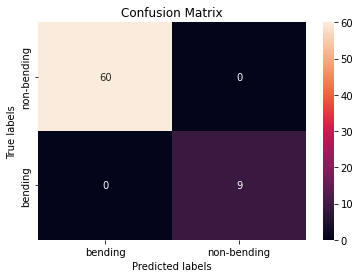

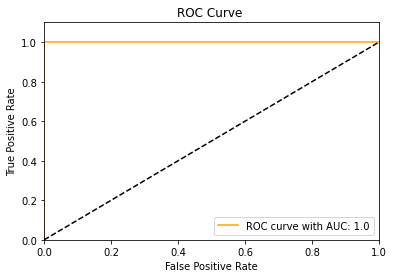

In [15]:
X_train1 = df_2aiii[best_LP[best_final['L']]]
y_train1 = df_2aiii['activity']

log_reg1 = LogisticRegression(solver='liblinear', C=sys.maxsize)
log_reg1 = log_reg1.fit(X_train1 , y_train1)

coeff = log_reg1.coef_[0]

_, p_value = chi2(X_train1 , y_train1)

best_coeff_p = []
for i in range(0, len(best_LP[best_final['L']])):
    best_coeff_p.append([best_LP[best_final['L']][i],coeff[i],p_value[i]])
    
display(pd.DataFrame(best_coeff_p,columns=['Feature Name', 'Coefficient', 'p-value']).style.set_caption("COEFFICIENT & P-VALUE FOR BEST FEATURES:"))

y_pred_train = log_reg1.predict(X_train1)

plot_confusion_matrix(y_train1, y_pred_train)

ACC_train = log_reg1.score(X_train1, y_train1)
print('ACCURACY FOR TRAINING DATA:', ACC_train)

y_pred_train_prob = log_reg1.predict_proba(X_train1)[::,1]
AUC_train = roc_auc_score(y_train1, y_pred_train_prob)
print('AREA UNDER CURVE FOR TRAINING DATA:',AUC_train)

plot_roc_curve(y_train1,y_pred_train_prob,AUC_train)

2(a)v. Test the classifier on the test set. Remember to break the time series in your test set into the same number of time series into which you broke your training set. Remember that the classifier has to be tested using the features extracted from the test set. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously.

BEST L:  11
ACCURACY FOR TESTING DATA:  0.9473684210526315
CROSS VALIDATION ACCURACY FOR TESTING DATA:  0.9857142857142858
AREA UNDER CURVE FOR TESTING DATA: 1.0


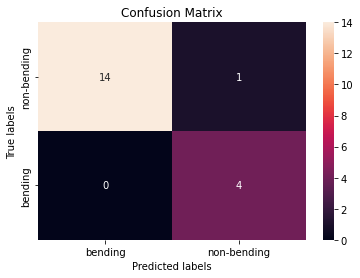

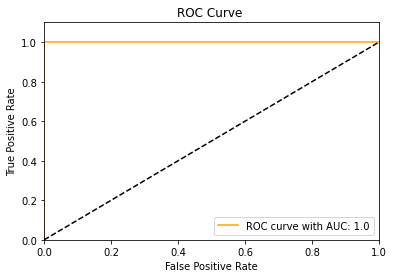

In [16]:
#FOR TEST DATA
best_test_df_params = []
test_df,feature_names = get_data_frame(test_data,best_l)

X_t = test_df[best_LP[best_final['L']]]
y_t = test_df['activity']

test_acc = log_reg1.score(X_t, y_t)

test_val_acc = best_final['Accuracy']

print("BEST L: ",best_l)
print("ACCURACY FOR TESTING DATA: ",test_acc)
print("CROSS VALIDATION ACCURACY FOR TESTING DATA: ",test_val_acc)

y_pred_t = log_reg1.predict(X_t)

y_predProb = log_reg1.predict_proba(X_t)[::,1]
AUC_test = roc_auc_score(y_t, y_predProb)
print('AREA UNDER CURVE FOR TESTING DATA:',AUC_test)

plot_confusion_matrix(y_t, y_pred_t)
plot_roc_curve(y_t,  y_predProb, AUC_test)

## FINDINGS:

From the accuracy values, it is clear that the accuracy for cross validation (train data) is greater than the accuracy for test data. This means that the model is fit pretty well

2(a)vi. Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?

### The bending and non-bending classes are not well separated. As a consequence, we use Stratified K Fold. It maintains the same class ratio throughout the K folds as the ratio in the original dataset.

2(a)vii. From the confusion matrices you obtained, do you see imbalanced classes? If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model.

Yes, we do come across imbalanced classes
BEFORE OVER-SAMPLING
Bending instances:  9
Non-Bending instances:  60
----------------------------------------------
AFTER OVER-SAMPLING
Bending instances:  60
Non-Bending instances:  60
----------------------------------------------
ACCURACY FOR TRAINING DATA:  1.0
AREA UNDER CURVE FOR TRAINING DATA:  1.0


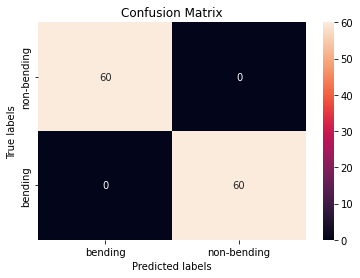

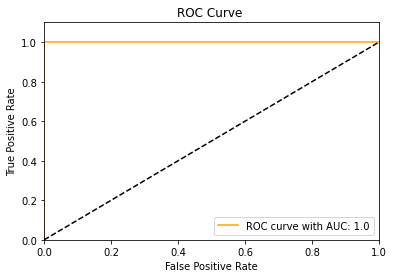

In [17]:
print("Yes, we do come across imbalanced classes")
X_train_before = df_2aiii[best_selected_features]
y_train_before = df_2aiii['activity']

count_value = df_2aiii['activity'].value_counts()
non_bending = count_value[0]
bending = count_value[1]

print('BEFORE OVER-SAMPLING')
print('Bending instances: ',bending)
print('Non-Bending instances: ',non_bending)
print('----------------------------------------------')

sm = SMOTE(sampling_strategy='all')
X_train_after, y_train_after = sm.fit_resample(X_train_before,y_train_before.ravel())

count_value_after = pd.DataFrame(y_train_after).value_counts()
non_bending_after = count_value_after[0]
bending_after = count_value_after[1]


print('AFTER OVER-SAMPLING')
print('Bending instances: ',bending_after)
print('Non-Bending instances: ',non_bending_after)
print('----------------------------------------------')

log_reg_sampling = LogisticRegression(solver='liblinear', C=sys.maxsize)
log_reg_sampling = log_reg_sampling.fit(X_train_after, y_train_after)

ACC_train_sample = log_reg_sampling.score(X_train_after, y_train_after)
print('ACCURACY FOR TRAINING DATA: ',ACC_train_sample)

y_pred_sample = log_reg_sampling.predict(X_train_after)

plot_confusion_matrix(y_train_after, y_pred_sample)
    
y_pred_sample_prob = log_reg_sampling.predict_proba(X_train_after)[::,1]
AUC_train_sample = roc_auc_score(y_train_after, y_pred_sample_prob)
print('AREA UNDER CURVE FOR TRAINING DATA: ',AUC_train_sample)

plot_roc_curve(y_train_after,  y_pred_sample_prob, AUC_train_sample)

ACCURACY FOR TESTING DATA:  0.9473684210526315
AREA UNDER CURVE FOR TESTING DATA:  1.0


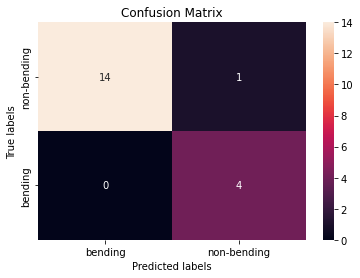

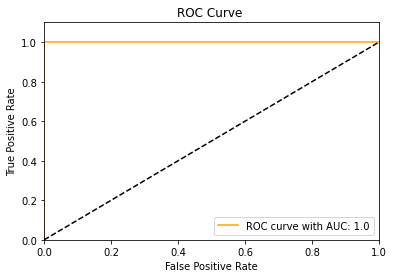

In [18]:
ACC_test_sample = log_reg_sampling.score(X_t, y_t)
print('ACCURACY FOR TESTING DATA: ',ACC_test_sample)

y_pred_test_sample = log_reg_sampling.predict(X_t)

plot_confusion_matrix(y_t, y_pred_test_sample)

y_pred_test_sample_prob = log_reg_sampling.predict_proba(X_t)[::,1]
AUC_test_sample = roc_auc_score(y_t, y_pred_test_sample_prob)
print('AREA UNDER CURVE FOR TESTING DATA: ',AUC_test_sample)

plot_roc_curve(y_t, y_pred_test_sample_prob,AUC_test_sample)

2(b) Binary Classification Using L1-penalized logistic regression

i. Repeat 2(a)iii using L1-penalized logistic regression,8 i.e. instead of using pvalues for variable selection, use L1 regularization. Note that in this problem, you have to cross-validate for both l, the number of time series into which you break each of your instances, and lambda, the weight of L1 penalty in your logistic regression objective function (or C, the budget). Packages usually perform cross-validation for lambda automatically.

In [19]:
L1_penalized_list = []
L1_penalized_train = {}
L1_lambda = {}
for l in range(1, 21):
    L1_train_df,feature_names = get_data_frame(train_data,l)

    norm = preprocessing.MinMaxScaler()
    norm = norm.fit_transform(L1_train_df.values)
    L1_train_df = pd.DataFrame(norm, columns=L1_train_df.columns)

    ACC_list_L1 = []
    AUC_list_L1 = []
    lambda_list_L1 = []
    X = L1_train_df.loc[:,L1_train_df.columns!='activity']
    y = L1_train_df['activity']

    skf_L1 = StratifiedKFold(n_splits=5, shuffle=False)
    for train_index, val_index in skf_L1.split(X,y):

        X_train_L1, X_val_L1 = X.iloc[train_index.tolist(),:], X.iloc[val_index.tolist(),:]
        y_train_L1, y_val_L1 = y[train_index.tolist()], y[val_index.tolist()]

        L1_log_reg = LogisticRegressionCV(cv=5, solver='liblinear', penalty='l1', max_iter=1000)
        L1_log_reg = L1_log_reg.fit(X_train_L1, y_train_L1)
        penalty = L1_log_reg.C_[0]
        lambda_ = 1/penalty
        
        ACC_L1_val = L1_log_reg.score(X_val_L1, y_val_L1)
        y_pred_prob = L1_log_reg.predict_proba(X_val_L1)[::,1]
        fpr, tpr, _ = roc_curve(y_val_L1,  y_pred_prob)
        AUC_L1_val = roc_auc_score(y_val_L1, y_pred_prob)
        
        ACC_list_L1.append(round(ACC_L1_val,3))
        AUC_list_L1.append(AUC_L1_val)
        lambda_list_L1.append(lambda_)

    best_L1 = np.argmax(ACC_list_L1)
    L1_lambda[l] = lambda_list_L1[best_L1]
    trainDataL[l] = df_2aiii
    
    L1_penalized_list.append([l,np.mean(ACC_list_L1),np.mean(AUC_list_L1),L1_lambda[l]])
    L1_penalized_train[l] = L1_train_df

df_L1 = pd.DataFrame(L1_penalized_list,columns = ['L', 'Accuracy', 'Area Under Curve','Lambda'])
display(df_L1)

best_final_L1 = df_L1.loc[df_L1['Accuracy'].idxmax()]
best_val_L1 = pd.DataFrame(best_final_L1).T.rename(index={5:"Best Values"})
best_l_L1 = int(best_val_L1['L'])
print("BEST L VALUE IS: ",best_l_L1)
best_lambda = L1_lambda[best_final_L1['L']]
print("BEST LAMBDA VALUE IS: ",best_lambda)

L  Accuracy  Area Under Curve    Lambda
0    1    0.9574          1.000000  0.046416
1    2    0.9286          0.991667  0.046416
2    3    0.9572          1.000000  0.046416
3    4    0.9716          0.991667  0.046416
4    5    0.8858          0.900000  0.359381
5    6    0.9430          0.958333  0.046416
6    7    0.9132          0.958333  0.005995
7    8    0.9430          0.975000  0.000774
8    9    0.9286          0.941667  0.005995
9   10    0.9000          0.916667  0.000774
10  11    0.8990          0.900000  0.359381
11  12    0.8990          0.925000  0.359381
12  13    0.9144          0.933333  0.046416
13  14    0.8990          0.975000  0.359381
14  15    0.9132          0.950000  0.000100
15  16    0.8990          0.941667  0.000774
16  17    0.8990          0.925000  0.046416
17  18    0.9132          0.950000  0.005995
18  19    0.8990          0.925000  0.000100
19  20    0.8704          0.900000  0.359381

BEST L VALUE IS:  4
BEST LAMBDA VALUE IS:  0.04641588833612782


ACCURACY FOR TRAINING DATA:  1.0
AREA UNDER CURVE FOR TRAINING DATA:  1.0


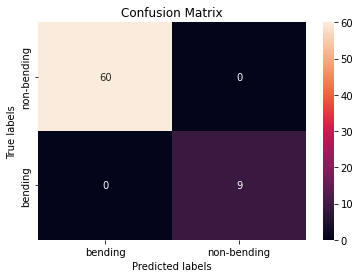

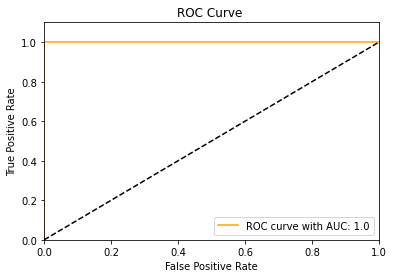

In [20]:
L1_train = L1_penalized_train[best_l_L1]
L1_X_train = L1_train.drop('activity', axis=1)
L1_y_train = pd.DataFrame(L1_train['activity'])
L1_y_train = np.array(L1_y_train).flatten()

L1_log_reg_model = LogisticRegression(solver='liblinear', penalty='l1', C=round(float(1/best_lambda), 3))
L1_log_reg_model = L1_log_reg_model.fit(L1_X_train, L1_y_train)

ACC_train_L1 = L1_log_reg_model.score(L1_X_train, L1_y_train)
print('ACCURACY FOR TRAINING DATA: ',ACC_train_L1)

L1_y_pred_train = L1_log_reg_model.predict(L1_X_train)  
L1_y_pred_train_prob = L1_log_reg_model.predict_proba(L1_X_train)[::,1]
AUC_train_L1 = roc_auc_score(L1_y_train, L1_y_pred_train_prob)
print('AREA UNDER CURVE FOR TRAINING DATA: ',AUC_train_L1)

plot_confusion_matrix(L1_y_train, L1_y_pred_train)
plot_roc_curve(L1_y_train,  L1_y_pred_train_prob,AUC_train_L1)

ACCURACY FOR TESTING DATA:  0.9473684210526315
AREA UNDER CURVE FOR TESTING DATA:  0.9833333333333334


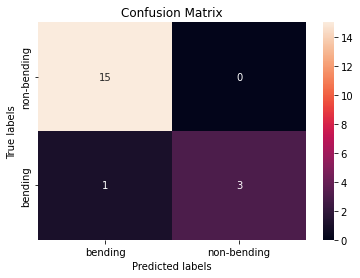

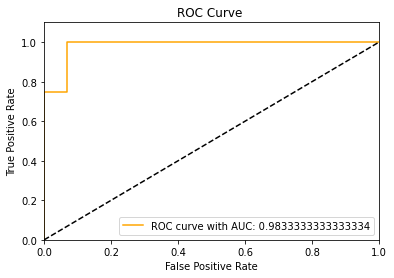

In [21]:
L1_test_df,feature_names = get_data_frame(test_data,best_l_L1)
L1_test_df = pd.DataFrame(L1_test_df, columns=feature_names)

norm2 = preprocessing.MinMaxScaler()
norm2 = norm2.fit_transform(L1_test_df.values)

L1_test_df = pd.DataFrame(norm2, columns=feature_names)

y_test_L1 = pd.DataFrame(L1_test_df['activity'])
X_test_L1 = L1_test_df.drop('activity', axis=1)

ACC_test_L1 = L1_log_reg_model.score(X_test_L1, y_test_L1)
print('ACCURACY FOR TESTING DATA: ',ACC_test_L1)

y_pred_test_L1 = L1_log_reg_model.predict(X_test_L1)
y_pred_test_L1_prob = L1_log_reg_model.predict_proba(X_test_L1)[::,1]
AUC_test_L1 = roc_auc_score(y_test_L1, y_pred_test_L1_prob)
print('AREA UNDER CURVE FOR TESTING DATA: ',AUC_test_L1)

plot_confusion_matrix(y_test_L1, y_pred_test_L1)
plot_roc_curve(y_test_L1,  y_pred_test_L1_prob, AUC_test_L1)


2(b)ii. Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement?

In [22]:
compare_val = pd.DataFrame([['Logistic Regression',ACC_train, AUC_train, test_acc, AUC_test],['Logistic Regression with L1-penalized',ACC_train_L1, AUC_train_L1, ACC_test_L1, AUC_test_L1]],columns=['Model', 'Training Accuracy', 'Training AUC', 'Testing Accuracy', 'Test AUC'])
display(compare_val)

Model  Training Accuracy  Training AUC  \
0                    Logistic Regression                1.0           1.0   
1  Logistic Regression with L1-penalized                1.0           1.0   

   Testing Accuracy  Test AUC  
0          0.947368  1.000000  
1          0.947368  0.983333

## Findings:

From the above table, we can see that both the models have similar train accuracies as well as area under the curve particularly for this dataset with selected statistical features like max, mean and standard deviation. However,theoritically Logistic Regression with L1-penalization should be a performing better since it implements only an extra argument for regularization. Thus making it easier and less complex when compared to the Logistic regression with variable selection model.

In [23]:
def get_multi_dataframe(data,l):
    df_multi = []
    for k,v in data.items():
        activity = k.split('/')[3]
        splits = np.array_split(v, l)
        file_stats_multi = []
        features_multi = []
        for idx,split in enumerate(splits):
            for i in range(0,6):
                stats = {'max':split[column_names[i]].max(),'mean':split[column_names[i]].mean(),'std':split[column_names[i]].std()}
                for feature in selected_stats:
                    if len(features_multi)<3*6*l:
                        features_multi.append(column_names[i]+ '_' + feature + '_split' + str(idx))
                    file_stats_multi.append(stats[feature])  
        idx = activity_file.index(activity)
        file_stats_multi.append(idx)
        df_multi.append(file_stats_multi)
        
    features_multi.append('activity')
    df_multi = pd.DataFrame(df_multi, columns=features_multi)
    return df_multi,features_multi

2(c) Multi-class Classification (The Realistic Case)

i. Find the best l in the same way as you found it in 2(b)i to build an L1-penalized multinomial regression model to classify all activities in your training set. Report your test error. Research how confusion matrices and ROC curves are defined for multiclass classification and show them for this problem if possible.

In [24]:
print("L1 PENALIZED MULTINOMIAL LOGISTIC REGRESSION")
L1_multi_penalized_data = []
L1_multi_train_data = {}
L1_multi_penalty = {}
for l in range(1, 21):
    L1_multi_train_df,feature_names = get_multi_dataframe(train_data,l)

    norm = preprocessing.MinMaxScaler()
    norm = norm.fit_transform(L1_multi_train_df[feature_names[:len(feature_names)-1]].values)
    normalizedDF = pd.DataFrame(norm, columns=feature_names[:len(feature_names)-1])
    L1_multi_train_df = normalizedDF.join(L1_multi_train_df['activity'])
        
    ACC_list_L1_multi = []
    penalty_list_L1_multi = []
    skf = StratifiedKFold(n_splits=5, shuffle=False)
    X = L1_multi_train_df.loc[:,L1_multi_train_df.columns!='activity']
    y = L1_multi_train_df['activity']

    for train_index, val_index in skf.split(L1_multi_train_df[feature_names], L1_multi_train_df['activity']):

        X_train, X_val = X.iloc[train_index.tolist(),:], X.iloc[val_index.tolist(),:]
        y_train, y_val = y[train_index.tolist()], y[val_index.tolist()]

        L1_multi_model_cv = LogisticRegressionCV(cv=5, solver='liblinear', penalty='l1', max_iter=1000, multi_class='auto')
        L1_multi_model_cv = L1_multi_model_cv.fit(X_train, y_train)
        penalties = L1_multi_model_cv.C_
 
        L1_multi_val_acc = L1_multi_model_cv.score(X_val, y_val)
        
        ACC_list_L1_multi.append(L1_multi_val_acc)
        penalty_list_L1_multi.append(penalties)
        
    max_accuracy_fold = np.argmax(ACC_list_L1_multi)
    L1_multi_penalty[l] = penalty_list_L1_multi[max_accuracy_fold]
    trainDataL[l] = df_2aiii
    
    L1_multi_penalized_data.append([l,np.mean(ACC_list_L1_multi)])    
    L1_multi_train_data[l] = L1_multi_train_df
    
multi_penal_df = pd.DataFrame(L1_multi_penalized_data,columns=['L', 'Accuracy'])
display(multi_penal_df)

best_final_L1_multi = multi_penal_df.loc[multi_penal_df['Accuracy'].idxmax()]
best_L_L1_multi = int(best_final_L1_multi['L'])
best_CV_ACC_L1_multi = best_final_L1_multi['Accuracy']
print("BEST L: ", best_L_L1_multi )
print("BEST CROSS VALIDATION ACCURACY: ",best_CV_ACC_L1_multi)
print('BEST LAMBDA FOR MULTINOMIAL LOGISTIC REGRESSION:')
best_lambda_L1_multi = []
for i in range(0, len(L1_multi_penalty[best_L_L1_multi])):
    best_lambda_L1_multi.append([activity_file[i],round(float(1/L1_multi_penalty[best_L_L1_multi][i]), 3)])
display(pd.DataFrame(best_lambda_L1_multi,columns=['Class Name', 'Lambda']))

L1 PENALIZED MULTINOMIAL LOGISTIC REGRESSION


L  Accuracy
0    1  0.768132
1    2  0.765934
2    3  0.768132
3    4  0.723077
4    5  0.726374
5    6  0.738462
6    7  0.668132
7    8  0.650549
8    9  0.694505
9   10  0.708791
10  11  0.563736
11  12  0.608791
12  13  0.593407
13  14  0.596703
14  15  0.667033
15  16  0.624176
16  17  0.639560
17  18  0.637363
18  19  0.726374
19  20  0.624176

BEST L:  3
BEST CROSS VALIDATION ACCURACY:  0.7681318681318682
BEST LAMBDA FOR MULTINOMIAL LOGISTIC REGRESSION:


Class Name     Lambda
0   bending1      0.359
1   bending2  10000.000
2    cycling      0.001
3      lying      0.046
4    sitting      0.359
5   standing      0.000
6    walking      0.359

In [25]:
def plot_confusion_matrix_multi(Train,Pred):
    cm = confusion_matrix(Train, Pred)
    plt.figure()
    ax= plt.subplot()
    sbn.heatmap(cm, annot=True, fmt='g', ax=ax)
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    return cm

In [26]:
def plot_roc_curve_multi(train, pred, model):
    fig,ax = plt.subplots(figsize=(10,5))
    for idx,clas in enumerate(model.classes_):
        fpr,tpr,_=roc_curve(train,pred[:,idx],pos_label=clas)
        ax.plot(fpr,tpr,label="ROC Curve for {} : with value:{}".format(clas,round(auc(fpr,tpr),3)))
    ax.plot([0, 1], [0, 1], "--")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.legend()
    ax.set_title("ROCs curve")
    plt.show()

--------------------------------------------------
L1-PENALIZED MULTINOMIAL LOGISTIC REGRESSION 
--------------------------------------------------
ACCURACY FOR TRAINING DATA:  1.0
ACCURACY FOR TESTING DATA:  0.631578947368421
TEST ERROR:  0.368421052631579
--------------------------------------------------
below plot show confusion matrix and roc curve for test data


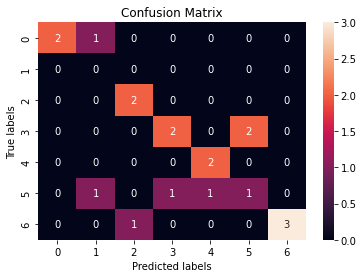

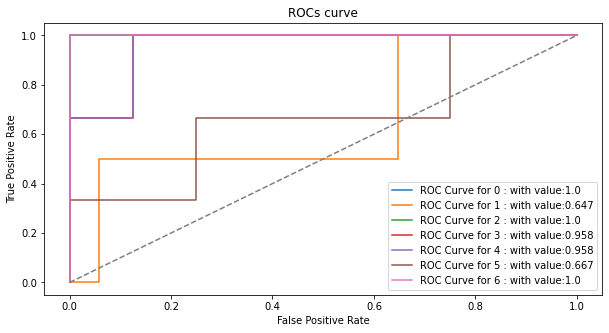

In [27]:
print("--------------------------------------------------")
print("L1-PENALIZED MULTINOMIAL LOGISTIC REGRESSION ")
print("--------------------------------------------------")
L1_multi_train_df,feature_names = get_multi_dataframe(train_data,best_L_L1_multi)

# norm = preprocessing.MinMaxScaler()
# norm = norm.fit_transform(L1_multi_train_df[feature_names[:len(feature_names)-1]].values)
# normalizedDF = pd.DataFrame(norm, columns=feature_names[:len(feature_names)-1])
# L1_multi_train_df = normalizedDF.join(L1_multi_train_df['activity'])

L1_multi_y_train = pd.DataFrame(L1_multi_train_df['activity'])
L1_multi_train_X = L1_multi_train_df.drop('activity', axis=1)

L1_multi_class_model = LogisticRegressionCV(cv=5, solver='liblinear', penalty='l1', max_iter=1000, multi_class='auto')
L1_multi_class_model = L1_multi_class_model.fit(L1_multi_train_X, L1_multi_y_train)

L1_multi_train_score = L1_multi_class_model.score(L1_multi_train_X, L1_multi_y_train)
print("ACCURACY FOR TRAINING DATA: ",L1_multi_train_score)

L1_multi_test_df,feature_names = get_multi_dataframe(test_data,best_L_L1_multi)

# norm2 = preprocessing.MinMaxScaler()
# norm2 = norm2.fit_transform(L1_multi_test_df[feature_names[:len(feature_names)-1]].values)
# normalizedDF2 = pd.DataFrame(norm, columns=feature_names[:len(feature_names)-1])
# L1_multi_test_df = normalizedDF2.join(L1_multi_train_df['activity'])

L1_multi_test_y = L1_multi_test_df['activity']
L1_multi_test_X = L1_multi_test_df.drop('activity', axis=1)
L1_multi_test_score = L1_multi_class_model.score(L1_multi_test_X, L1_multi_test_y)
print("ACCURACY FOR TESTING DATA: ",L1_multi_test_score)
print("TEST ERROR: ",1-L1_multi_test_score)

L1_multi_y_pred = L1_multi_class_model.predict(L1_multi_test_X)  
L1_multi_y_pred_prob = L1_multi_class_model.predict_proba(L1_multi_test_X)

print("--------------------------------------------------")
print("below plot show confusion matrix and roc curve for test data")
plot_confusion_matrix_multi(L1_multi_y_pred,L1_multi_test_y)
plot_roc_curve_multi(L1_multi_test_y,  L1_multi_y_pred_prob,L1_multi_class_model)


2(c)ii. Repeat 2(c)i using a Naive Bayes' classifier. Use both Gaussian and Multinomial priors and compare the results.

In [28]:
print("GAUSSIAN NAIVE BAYES")
gaussian_train_data = {}
gaussian_data = []

for l in range(1, 21):
    gaussian_train_df, feature_names = get_multi_dataframe(train_data,l)

    skf = StratifiedKFold(n_splits=5, shuffle=False)
    ACC_list_gaussian = []

    X = gaussian_train_df.loc[:,gaussian_train_df.columns!='activity']
    y = gaussian_train_df['activity']

    for train_index, val_index in skf.split(gaussian_train_df[feature_names], gaussian_train_df['activity']):

        X_train, X_val = X.iloc[train_index.tolist(),:], X.iloc[val_index.tolist(),:]
        y_train, y_val = y[train_index.tolist()], y[val_index.tolist()]
        
        gaussian_model = GaussianNB()
        gaussian_model = gaussian_model.fit(X_train, y_train)

        val_acc_gaussian = gaussian_model.score(X_val, y_val)
        ACC_list_gaussian.append(val_acc_gaussian)

    gaussian_data.append([l,np.mean(ACC_list_gaussian)])
    gaussian_train_data[l] = gaussian_train_df
    
gaussian_all_l = pd.DataFrame(gaussian_data,columns = ['L', 'Accuracy'])
display(gaussian_all_l)

best_final_gaussian = gaussian_all_l.loc[gaussian_all_l['Accuracy'].idxmax()]
best_L_gaussian = int(best_final_gaussian['L'])
best_CV_ACC_gaussian = best_final_gaussian['Accuracy']
print("BEST L: ", best_L_gaussian )
print("BEST CROSS VALIDATION ACCURACY: ",best_CV_ACC_gaussian)

GAUSSIAN NAIVE BAYES


L  Accuracy
0    1  0.854945
1    2  0.856044
2    3  0.797802
3    4  0.869231
4    5  0.826374
5    6  0.840659
6    7  0.854945
7    8  0.840659
8    9  0.812088
9   10  0.769231
10  11  0.797802
11  12  0.812088
12  13  0.754945
13  14  0.797802
14  15  0.769231
15  16  0.768132
16  17  0.739560
17  18  0.739560
18  19  0.812088
19  20  0.753846

BEST L:  4
BEST CROSS VALIDATION ACCURACY:  0.8692307692307694


--------------------------------------------------
GAUSSIAN NAIVE BAYES MULTI-CLASS: 
--------------------------------------------------
ACCURACY FOR TRAINING DATA:  0.9855072463768116
ACCURACY FOR TESTING DATA:  0.8947368421052632
TEST ERROR:  0.10526315789473684
--------------------------------------------------
below plot show confusion matrix and roc curve for test data


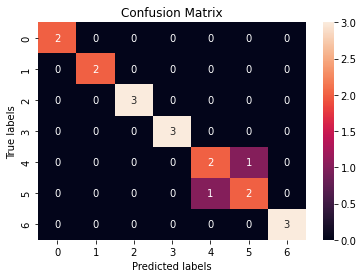

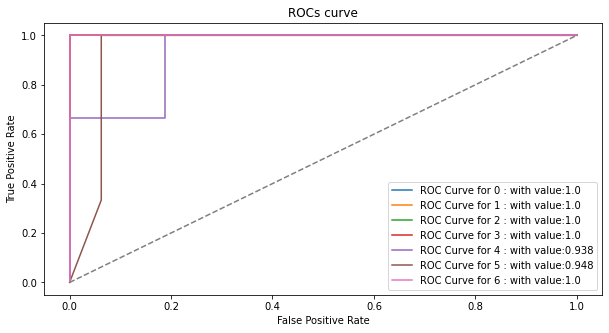

In [29]:
print("--------------------------------------------------")
print("GAUSSIAN NAIVE BAYES MULTI-CLASS: ")
print("--------------------------------------------------")
Gaussian_train_df,feature_names = get_multi_dataframe(train_data,best_L_gaussian)
gaussian_train_y = pd.DataFrame(Gaussian_train_df['activity'])
gaussian_train_X = Gaussian_train_df.drop('activity', axis=1)

gaussian_train_y = np.array(gaussian_train_y).flatten()

gaussian_model = GaussianNB()
gaussian_model = gaussian_model.fit(gaussian_train_X, gaussian_train_y)
gaussian_train_score = gaussian_model.score(gaussian_train_X, gaussian_train_y)
print("ACCURACY FOR TRAINING DATA: ",gaussian_train_score)

gaussian_test_df,feature_names = get_multi_dataframe(test_data,best_L_gaussian)
gaussian_test_y = gaussian_test_df['activity']
gaussian_test_X = gaussian_test_df.drop('activity', axis=1)
gaussian_test_score = gaussian_model.score(gaussian_test_X, gaussian_test_y)
print("ACCURACY FOR TESTING DATA: ",gaussian_test_score)
print("TEST ERROR: ",1-gaussian_test_score)

gaussian_y_pred = gaussian_model.predict(gaussian_test_X)  
gaussian_y_pred_prob = gaussian_model.predict_proba(gaussian_test_X)

print("--------------------------------------------------")
print("below plot show confusion matrix and roc curve for test data")
plot_confusion_matrix_multi(gaussian_y_pred,gaussian_test_y)
plot_roc_curve_multi(gaussian_test_y,  gaussian_y_pred_prob, gaussian_model,)

In [30]:
print("MULTINOMIAL NAIVE BAYES")
multinomial_train_data = {}
multinomial_data = []

for l in range(1, 21):
    multinomial_train_df, feature_names = get_multi_dataframe(train_data,l)

    skf = StratifiedKFold(n_splits=5, shuffle=False)
    ACC_list_multinomial = []

    X = multinomial_train_df.loc[:,multinomial_train_df.columns!='activity']
    y = multinomial_train_df['activity']

    for train_index, val_index in skf.split(multinomial_train_df[feature_names], multinomial_train_df['activity']):

        X_train, X_val = X.iloc[train_index.tolist(),:], X.iloc[val_index.tolist(),:]
        y_train, y_val = y[train_index.tolist()], y[val_index.tolist()]
        
        multinomial_model = MultinomialNB()
        multinomial_model = multinomial_model.fit(X_train, y_train)

        val_acc_multinomial = multinomial_model.score(X_val, y_val)
        ACC_list_multinomial.append(val_acc_multinomial)

    multinomial_data.append([l,np.mean(ACC_list_multinomial)])
    multinomial_train_data[l] = multinomial_train_df
    
multinomial_all_l = pd.DataFrame(multinomial_data,columns = ['L', 'Accuracy'])
display(multinomial_all_l)

best_final_multinomial = multinomial_all_l.loc[multinomial_all_l['Accuracy'].idxmax()]
best_L_multinomial = int(best_final_multinomial['L'])
best_CV_ACC_multinomial = best_final_multinomial['Accuracy']
print("BEST L: ", best_L_multinomial )
print("BEST CROSS VALIDATION ACCURACY: ",best_CV_ACC_multinomial)

MULTINOMIAL NAIVE BAYES


L  Accuracy
0    1  0.825275
1    2  0.826374
2    3  0.812088
3    4  0.826374
4    5  0.810989
5    6  0.839560
6    7  0.796703
7    8  0.812088
8    9  0.796703
9   10  0.782418
10  11  0.812088
11  12  0.768132
12  13  0.812088
13  14  0.782418
14  15  0.737363
15  16  0.782418
16  17  0.752747
17  18  0.769231
18  19  0.782418
19  20  0.723077

BEST L:  6
BEST CROSS VALIDATION ACCURACY:  0.8395604395604396


--------------------------------------------------
MULTINOMIAL NAIVE BAYES FOR MULTI-CLASS 
--------------------------------------------------
ACCURACY FOR TRAINING DATA:  0.927536231884058
ACCURACY FOR TESTING DATA:  0.8421052631578947
TEST ERROR:  0.1578947368421053
--------------------------------------------------
below plot show confusion matrix and roc curve for test data


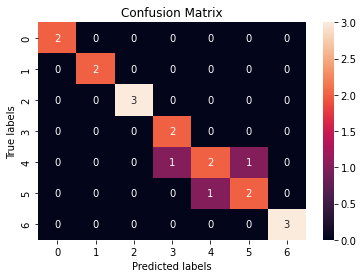

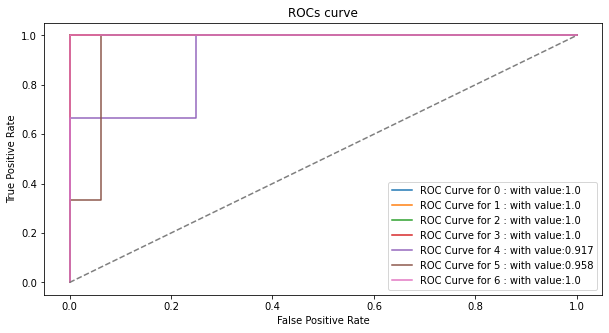

In [31]:
print("--------------------------------------------------")
print("MULTINOMIAL NAIVE BAYES FOR MULTI-CLASS ")
print("--------------------------------------------------")
multinomial_train_df,feature_names = get_multi_dataframe(train_data,best_L_multinomial)
multinomial_train_y = pd.DataFrame(multinomial_train_df['activity'])
multinomial_train_X = multinomial_train_df.drop('activity', axis=1)

multinomial_train_y = np.array(multinomial_train_y).flatten()

multinomial_model = MultinomialNB()
multinomial_model = multinomial_model.fit(multinomial_train_X, multinomial_train_y)
multinomial_train_score = multinomial_model.score(multinomial_train_X, multinomial_train_y)
print("ACCURACY FOR TRAINING DATA: ",multinomial_train_score)

multinomial_test_df,feature_names = get_multi_dataframe(test_data,best_L_multinomial)
multinomial_test_y = multinomial_test_df['activity']
multinomial_test_X = multinomial_test_df.drop('activity', axis=1)
multinomial_test_score = multinomial_model.score(multinomial_test_X, multinomial_test_y)
print("ACCURACY FOR TESTING DATA: ",multinomial_test_score)
print("TEST ERROR: ",1-multinomial_test_score)

multinomial_y_pred = multinomial_model.predict(multinomial_test_X)  
multinomial_y_pred_prob = multinomial_model.predict_proba(multinomial_test_X)

print("--------------------------------------------------")
print("below plot show confusion matrix and roc curve for test data")
plot_confusion_matrix_multi(multinomial_y_pred,multinomial_test_y)
plot_roc_curve_multi(multinomial_test_y,  multinomial_y_pred_prob, multinomial_model,)

In [32]:
compare_val_multi = pd.DataFrame([
    ['Multiclass Logistic Regression',L1_multi_train_score, L1_multi_test_score, 1-L1_multi_test_score],
    ['Gaussian Naive Bayes',gaussian_train_score, gaussian_test_score, 1-gaussian_test_score],
    ['Multinomial Naive Bayes',multinomial_train_score,multinomial_test_score,1-multinomial_test_score]],columns=['Model', 'Training Accuracy', 'Testing Accuracy', 'Test Error'])
display(compare_val_multi)

Model  Training Accuracy  Testing Accuracy  \
0  Multiclass Logistic Regression           1.000000          0.631579   
1            Gaussian Naive Bayes           0.985507          0.894737   
2         Multinomial Naive Bayes           0.927536          0.842105   

   Test Error  
0    0.368421  
1    0.105263  
2    0.157895

2(c)iii. Which method is better for multi-class classification in this problem?

## FINDINGS:

For time series classification dataset with mean, max and standard deviation as statistica features, we can infer from the above table that Gaussian Naive Bayes classifier has performed better from the rest with the least test error. However, theoritically when we consider the Area Under Curve by referring the ROC plots, Multinomial Naive Bayes classifier is the best model.

## ISLR 4.8.3

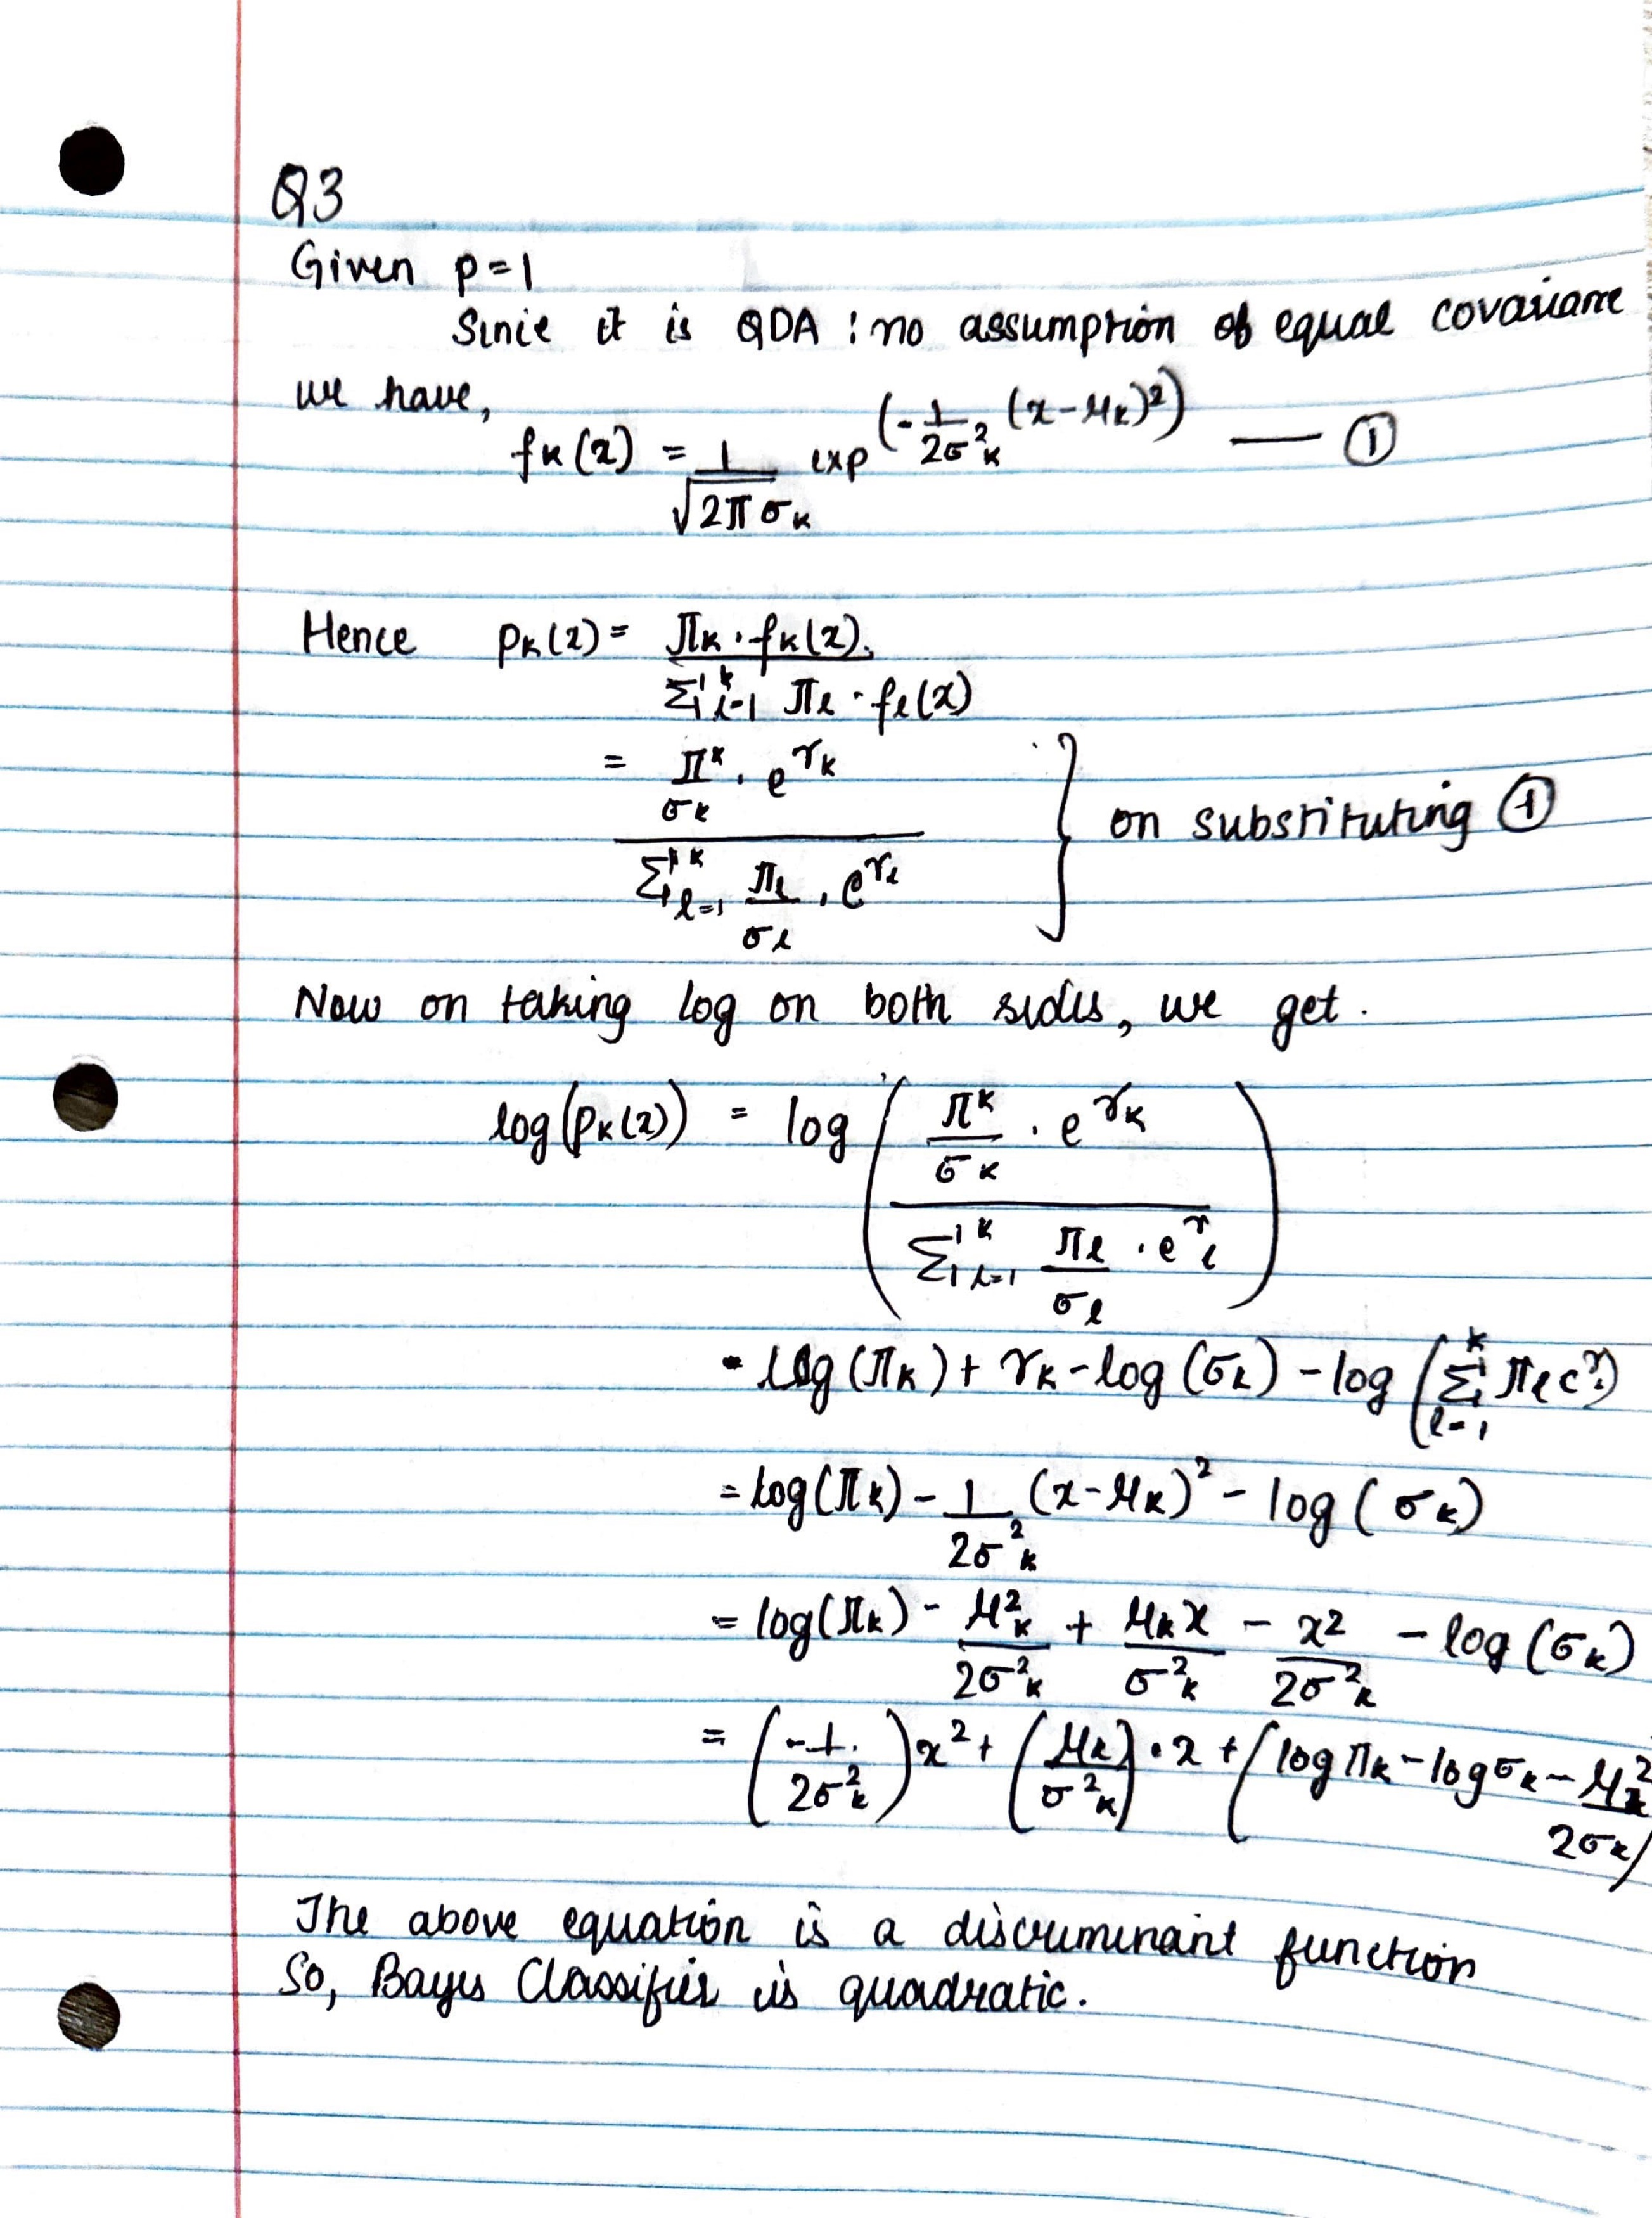

## ISLR 4.8.7

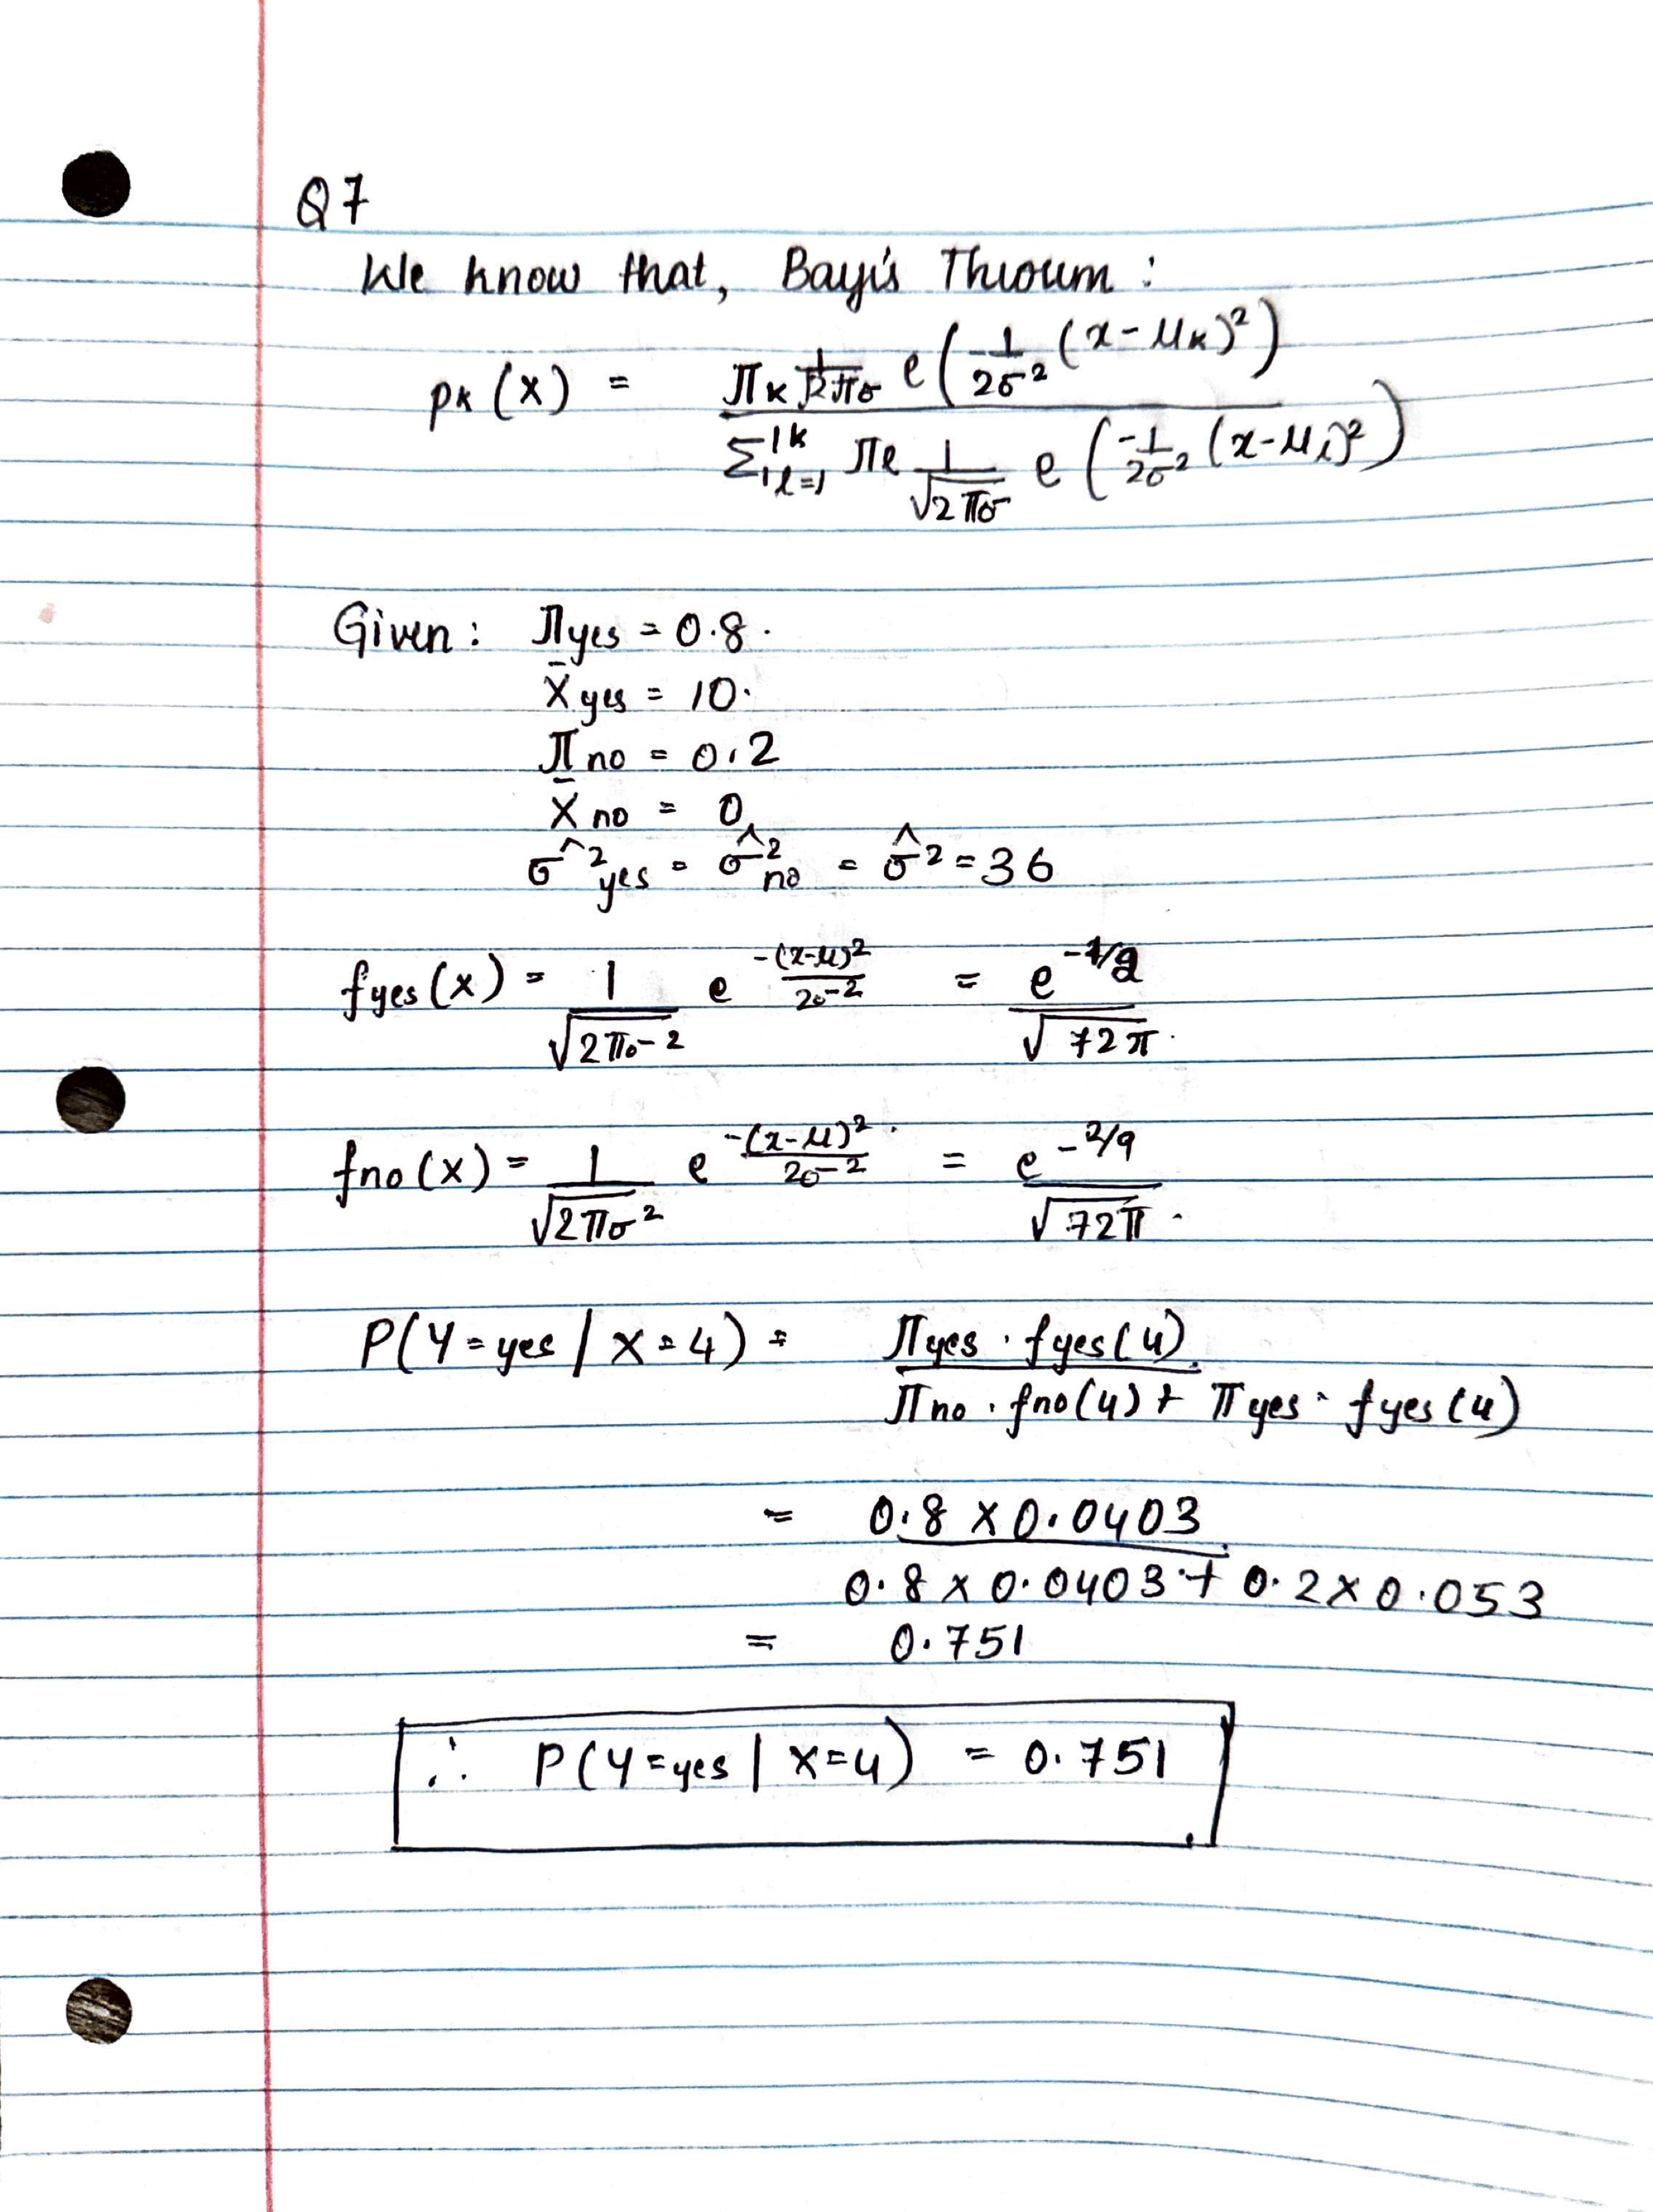

REFERENCES

[1] - https://towardsdatascience.com/calculating-confidence-interval-with-bootstrapping-872c657c058d

[2] - https://machinelearningmastery.com/calculate-bootstrap-confidence-intervals-machine-learning-results-python/

[3] - https://www.statology.org/bootstrapping-in-python/

[4] - https://realpython.com/python-data-cleaning-numpy-pandas/

[5] - https://stackoverflow.com/questions/33440805/pandas-dataframe-read-csv-on-bad-data

[6] - https://stats.stackexchange.com/questions/241634/comparing-rss-from-linear-and-higher-power-models-in-a-training-and-test-data

[7] - https://stats.stackexchange.com/questions/50807/features-for-time-series-classification

[8] - https://towardsdatascience.com/multiclass-classification-evaluation-with-roc-curves-and-roc-auc-294fd4617e3a

[9] - https://www.kaggle.com/code/saurabhbagchi/multinomial-logistic-regression-for-beginners/notebook

[10] - https://refactored.ai/microcourse/notebook?path=content%2F06-Classification_models_in_Machine_Learning%2F02-Multivariate_Logistic_Regression%2Fmulticlass_logistic-regression.ipynb

[11] - https://machinelearningmastery.com/multinomial-logistic-regression-with-python/

[12] - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

[13] - https://machinelearningmastery.com/tinyurl.com/Time-Series-Classification

[14] - https://www.datasklr.com/logistic-regression/multinomial-logistic-regression

[15] - https://machinelearningmastery.com/multinomial-logistic-regression-with-python/

[16] - https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html

[17] - https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-definitions

[18] - https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

[19] - https://machinelearningmastery.com/rfe-feature-selection-in-python/

[20] - https://www.kdnuggets.com/2020/10/feature-ranking-recursive-feature-elimination-scikit-learn.html
